# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19043675,
            "id": 1,
            "last_updated": 1652926482,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 548359614477,
                    "percent_change_1h": -1.01603020721671,
                    "percent_change_24h": -4.68898304562717,
                    "percent_change_7d": -0.565586735627036,
                    "percentage_change_1h": -1.01603020721671,
                    "percentage_change_24h": -4.68898304562717,
                    "percentage_change_7d": -0.565586735627036,
                    "price": 28750.0,
                    "volume_24h": 26281852559
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19043675,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120834762,
            "id": 1027,
            "last_updated": 1652926408,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 231166351668,
                    "percent_change_1h": -1.59155744247702,
                    "percent_change_24h": -7.77513246622743,
                    "percent_change_7d": -8.19596770364651,
                    "percentage_change_1h": -1.59155744247702,
                    "percentage_change_24h": -7.77513246622743,
                    "percentage_change_7d": -8.19596770364651,
                    "price": 1910.36,
                    "volume_24h": 15906012462
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120834762,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f'The current price of 1 BTC in USD is ${btc_price:.2f}.')


The current price of 1 BTC in USD is $28750.00.


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'The current price of 1 ETH in USD is ${eth_price:.2f}.')


The current price of 1 ETH in USD is $1910.36.


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f'You have {btc_coins} and at a current price of ${btc_price:.2f}, your current BTC portfolio is equal to ${btc_value:.2f}.')


You have 1.2 and at a current price of $28750.00, your current BTC portfolio is equal to $34500.00.


In [11]:
# Compute the current value of the ETH holding 
eth_value =eth_coins * eth_price
# Print current value of your holding in ETH
print(f'You have {eth_coins} and at a current price of ${eth_price:.2f}, your current ETH portfolio is equal to ${eth_value:.2f}.')

You have 5.3 and at a current price of $1910.36, your current ETH portfolio is equal to $10124.91.


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'Your total cryptocurrency wallet balance is ${total_crypto_wallet:.2f}.')


Your total cryptocurrency wallet balance is $44624.91.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

print(type(alpaca_api_key),type(alpaca_secret_key))

<class 'str'> <class 'str'>


In [15]:
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2020-05-13',tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-05-13', tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

prices_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-05-13 04:00:00+00:00,116.63,116.76,116.450,116.6,4425927,16375,116.647726,AGG
2020-05-13 04:00:00+00:00,285.95,287.19,278.965,281.6,144809899,833463,282.592780,SPY


In [18]:
# Reorganize the DataFrame
# Separate ticker data
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol',axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

display(AGG,SPY)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-05-13 04:00:00+00:00,116.63,116.76,116.45,116.6,4425927,16375,116.647726


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-05-13 04:00:00+00:00,285.95,287.19,278.965,281.6,144809899,833463,282.59278


In [19]:
# Concatenate the ticker DataFrames
prices_df = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()

AGG                                              \
                             open    high     low  close   volume trade_count   
timestamp                                                                       
2020-05-13 04:00:00+00:00  116.63  116.76  116.45  116.6  4425927       16375   

                                          SPY                          \
                                 vwap    open    high      low  close   
timestamp                                                               
2020-05-13 04:00:00+00:00  116.647726  285.95  287.19  278.965  281.6   

                                                             
                              volume trade_count       vwap  
timestamp                                                    
2020-05-13 04:00:00+00:00  144809899      833463  282.59278

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [20]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = prices_df['AGG']['close']

# Print the AGG closing price
print(agg_close_price)


timestamp
2020-05-13 04:00:00+00:00    116.6
Name: close, dtype: float64


In [21]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = prices_df['SPY']['close']

# Print the SPY closing price
print(spy_close_price)


timestamp
2020-05-13 04:00:00+00:00    281.6
Name: close, dtype: float64


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [22]:
# Calculate the current value of the bond portion of the portfolio
agg_value = float(agg_shares * agg_close_price)

# Print the current value of the bond portfolio
print(f'The current values of your AGG bond portfolio is ${agg_value:.2f}.')


The current values of your AGG bond portfolio is $23320.00.


In [23]:
# Calculate the current value of the stock portion of the portfolio
spy_value = float(spy_shares * spy_close_price)

# Print the current value of the stock portfolio
print(f'The current value of your stock portfolio is ${spy_value:.2f}.')


The current value of your stock portfolio is $30976.00.


In [24]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'The total balance of your stock and bond portfolios is ${total_stocks_bonds:.2f}.')


The total balance of your stock and bond portfolios is $54296.00.


In [25]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet and stock and bonds balances
print(f'In total, your cryptocurrency wallet and stocks and bonds have a total balance of ${total_portfolio:.2f}.')


In total, your cryptocurrency wallet and stocks and bonds have a total balance of $98920.91.


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [26]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[44624.907999999996, 54296.0]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [27]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data,columns=['amount'],index=['crypto','stock/bond'])

# Display the savings_df DataFrame
savings_df.head()


,amount
crypto,44624.908
stock/bond,54296.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Your total portfolio balance (crypto and stock/bond).'}, ylabel='amount'>

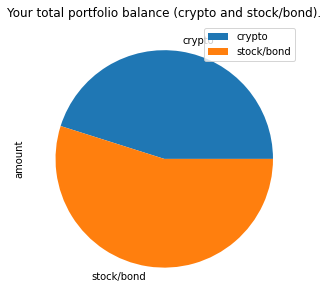

In [28]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', figsize=(5,5),title='Your total portfolio balance (crypto and stock/bond).')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [29]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3
display(emergency_fund_value)

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [30]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations! You have enough money in this fund!')
elif total_portfolio == emergency_fund_value:
    print('Congratulations! You have reached an important financial goal!')
else:
    print(f'There may be holes in your funds, you still need to save {emergency_fund_value - total_portfolio:.2f}.')



Congratulations! You have enough money in this fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [31]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp('2019-05-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-13', tz='America/New_York').isoformat()
 
# Set number of rows to 1000 to retrieve the maximum amount of rows
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [32]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
long_term_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

display(long_term_prices_df.head(10),long_term_prices_df.tail(10))

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-13 04:00:00+00:00,108.83,108.9768,108.815,108.85,6733774,18575,108.884846,AGG
2019-05-14 04:00:00+00:00,108.90,108.9700,108.870,108.94,6217044,21837,108.919203,AGG
2019-05-15 04:00:00+00:00,109.16,109.1800,109.000,109.13,2667156,12362,109.089171,AGG
2019-05-16 04:00:00+00:00,109.04,109.0400,108.950,109.00,2756957,9263,108.993556,AGG
2019-05-17 04:00:00+00:00,109.12,109.1450,108.935,109.03,2092402,7452,109.023836,AGG
2019-05-20 04:00:00+00:00,108.98,109.0568,108.860,108.88,2035081,9880,108.929741,AGG
2019-05-21 04:00:00+00:00,108.86,108.9100,108.810,108.87,2029825,10303,108.866734,AGG
2019-05-22 04:00:00+00:00,108.92,109.0900,108.920,109.05,3509876,16272,109.052999,AGG
2019-05-23 04:00:00+00:00,109.18,109.5000,109.140,109.37,4922489,21453,109.375381,AGG


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-05-02 04:00:00+00:00,412.01,415.92,405.0200,414.48,157684938,1459109,411.158285,SPY
2022-05-03 04:00:00+00:00,414.91,418.93,413.3600,416.38,99739343,849671,416.097976,SPY
2022-05-04 04:00:00+00:00,417.13,429.66,413.7099,429.06,143203740,1455621,421.265866,SPY
2022-05-05 04:00:00+00:00,424.58,425.00,409.4400,413.81,172192959,1578716,415.441556,SPY
2022-05-06 04:00:00+00:00,411.16,414.80,405.7300,411.34,150936483,1523046,410.515873,SPY
2022-05-09 04:00:00+00:00,405.20,406.41,396.5000,398.17,156333670,1408490,401.884780,SPY
2022-05-10 04:00:00+00:00,404.50,406.08,394.8200,399.09,132731278,1458363,399.842816,SPY
2022-05-11 04:00:00+00:00,397.99,404.04,391.9600,392.75,141196433,1516301,397.449342,SPY
2022-05-12 04:00:00+00:00,389.58,395.80,385.1500,392.34,125230250,1476378,389.974924,SPY


In [33]:
# Reorganize the DataFrame
# Separate ticker data
AGG_two = long_term_prices_df[long_term_prices_df['symbol']=='AGG'].drop('symbol',axis=1)
SPY_two = long_term_prices_df[long_term_prices_df['symbol']=='SPY'].drop('symbol', axis=1)

display(AGG_two,SPY_two)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-05-13 04:00:00+00:00,108.83,108.9768,108.815,108.85,6733774,18575,108.884846
2019-05-14 04:00:00+00:00,108.90,108.9700,108.870,108.94,6217044,21837,108.919203
2019-05-15 04:00:00+00:00,109.16,109.1800,109.000,109.13,2667156,12362,109.089171
2019-05-16 04:00:00+00:00,109.04,109.0400,108.950,109.00,2756957,9263,108.993556
2019-05-17 04:00:00+00:00,109.12,109.1450,108.935,109.03,2092402,7452,109.023836
...,...,...,...,...,...,...,...
2022-05-09 04:00:00+00:00,101.54,102.1000,101.475,102.07,8548918,27200,101.812100
2022-05-10 04:00:00+00:00,102.50,102.7200,102.320,102.38,16565694,46588,102.531695
2022-05-11 04:00:00+00:00,102.07,102.7850,101.960,102.76,15079560,42508,102.530147


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-05-13 04:00:00+00:00,282.39,283.49,279.9300,280.86,127837979,670187,281.560182
2019-05-14 04:00:00+00:00,282.01,285.10,281.8500,283.40,77106090,390251,283.609239
2019-05-15 04:00:00+00:00,281.60,285.77,281.3600,285.06,75152409,364823,284.276653
2019-05-16 04:00:00+00:00,285.83,289.21,285.7600,287.70,77186068,352847,287.797144
2019-05-17 04:00:00+00:00,285.13,288.60,285.1207,285.84,100853024,401172,286.609816
...,...,...,...,...,...,...,...
2022-05-09 04:00:00+00:00,405.20,406.41,396.5000,398.17,156333670,1408490,401.884780
2022-05-10 04:00:00+00:00,404.50,406.08,394.8200,399.09,132731278,1458363,399.842816
2022-05-11 04:00:00+00:00,397.99,404.04,391.9600,392.75,141196433,1516301,397.449342


In [34]:
# Concatenate the ticker DataFrames
long_term_prices_df = pd.concat([AGG_two,SPY_two], axis=1, keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
display(long_term_prices_df.head(),long_term_prices_df.tail(252))
# YOUR CODE HERE

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-05-13 04:00:00+00:00  108.83  108.9768  108.815  108.85  6733774   
2019-05-14 04:00:00+00:00  108.90  108.9700  108.870  108.94  6217044   
2019-05-15 04:00:00+00:00  109.16  109.1800  109.000  109.13  2667156   
2019-05-16 04:00:00+00:00  109.04  109.0400  108.950  109.00  2756957   
2019-05-17 04:00:00+00:00  109.12  109.1450  108.935  109.03  2092402   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2019-05-13 04:00:00+00:00       18575  108.884846  282.39  283.49  279.9300   
2019-05-14 04:00:00+00:00       21837  108.919203  282.01  285.10  281.8500   
2019-05-15 04:00:00+00:00       12362  109.089171  281.60  285.77  281.3600   
2019-05-16 04:00:00+00:00        9263  108.993556  285.83  289.21  285.7600   
2019-05-17 04:00:00+00:00        7452  109.023836  285.13  288.60  285.1207   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-05-13 04:00:00+00:00  280.86  127837979      670187  281.560182  
2019-05-14 04:00:00+00:00  283.40   77106090      390251  283.609239  
2019-05-15 04:00:00+00:00  285.06   75152409      364823  284.276653  
2019-05-16 04:00:00+00:00  287.70   77186068      352847  287.797144  
2019-05-17 04:00:00+00:00  285.84  100853024      401172  286.609816

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2021-05-17 04:00:00+00:00  114.21  115.4999  111.260  114.20   4928201   
2021-05-18 04:00:00+00:00  114.11  114.1100  114.030  114.06   3674624   
2021-05-19 04:00:00+00:00  114.03  114.6200  113.790  113.90   6892443   
2021-05-20 04:00:00+00:00  114.08  114.3000  114.080  114.29   6243292   
2021-05-21 04:00:00+00:00  114.36  114.4000  114.230  114.34   3874459   
...                           ...       ...      ...     ...       ...   
2022-05-09 04:00:00+00:00  101.54  102.1000  101.475  102.07   8548918   
2022-05-10 04:00:00+00:00  102.50  102.7200  102.320  102.38  16565694   
2022-05-11 04:00:00+00:00  102.07  102.7850  101.960  102.76  15079560   
2022-05-12 04:00:00+00:00  102.94  103.1400  102.865  102.95   9011922   
2022-05-13 04:00:00+00:00  102.75  102.7800  102.480  102.51   6701432   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2021-05-17 04:00:00+00:00       14402  114.197573  415.39  416.390  413.36   
2021-05-18 04:00:00+00:00       15681  114.072618  415.79  416.060  411.77   
2021-05-19 04:00:00+00:00       21080  113.973093  406.93  411.050  405.33   
2021-05-20 04:00:00+00:00       18481  114.240783  411.77  416.625  411.67   
2021-05-21 04:00:00+00:00       12593  114.294342  416.83  418.200  414.45   
...                               ...         ...     ...      ...     ...   
2022-05-09 04:00:00+00:00       27200  101.812100  405.20  406.410  396.50   
2022-05-10 04:00:00+00:00       46588  102.531695  404.50  406.080  394.82   
2022-05-11 04:00:00+00:00       42508  102.530147  397.99  404.040  391.96   
2022-05-12 04:00:00+00:00       29535  103.014617  389.58  395.800  385.15   
2022-05-13 04:00:00+00:00       26730  102.590449  396.73  403.180  395.61   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2021-05-17 04:00:00+00:00  415.52   65202192      446556  415.001147  
2021-05-18 04:00:00+00:00  411.94   59810263      410366  414.309890  
2021-05-19 04:00:00+00:00  410.86  106512663      740858  408.587533  
2021-05-20 04:00:00+00:00  415.28   78034807      483772  414.360499  
2021-05-21 04:00:00+00:00  414.94   76587685      471829  415.940915  
...                           ...        ...         ...         ...  
2022-05-09 04:00:00+00:00  398.17  156333670     1408490  401.884780  
2022-05-10 04:00:00+00:00  399.09  132731278     1458363  399.842816  
2022-05-11 04:00:00+00:00  392.75  141196433     1516301  397.449342  
2022-05-12 04:00:00+00:00  392.34  125230250     1476378  389.974924  
2022-05-13 04:00:00+00:00  401.72  103901082      855050  399.875308  

[252 rows x 14 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [35]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_year = MCSimulation(
    portfolio_data= long_term_prices_df,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252 * 30
)

# Review the simulation input data
MC_thirty_year.portfolio_data.head(10)


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-05-13 04:00:00+00:00  108.83  108.9768  108.815  108.85  6733774   
2019-05-14 04:00:00+00:00  108.90  108.9700  108.870  108.94  6217044   
2019-05-15 04:00:00+00:00  109.16  109.1800  109.000  109.13  2667156   
2019-05-16 04:00:00+00:00  109.04  109.0400  108.950  109.00  2756957   
2019-05-17 04:00:00+00:00  109.12  109.1450  108.935  109.03  2092402   
2019-05-20 04:00:00+00:00  108.98  109.0568  108.860  108.88  2035081   
2019-05-21 04:00:00+00:00  108.86  108.9100  108.810  108.87  2029825   
2019-05-22 04:00:00+00:00  108.92  109.0900  108.920  109.05  3509876   
2019-05-23 04:00:00+00:00  109.18  109.5000  109.140  109.37  4922489   
2019-05-24 04:00:00+00:00  109.37  109.4499  109.330  109.41  2010339   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-05-13 04:00:00+00:00       18575  108.884846          NaN  282.39   
2019-05-14 04:00:00+00:00       21837  108.919203     0.000827  282.01   
2019-05-15 04:00:00+00:00       12362  109.089171     0.001744  281.60   
2019-05-16 04:00:00+00:00        9263  108.993556    -0.001191  285.83   
2019-05-17 04:00:00+00:00        7452  109.023836     0.000275  285.13   
2019-05-20 04:00:00+00:00        9880  108.929741    -0.001376  284.06   
2019-05-21 04:00:00+00:00       10303  108.866734    -0.000092  285.83   
2019-05-22 04:00:00+00:00       16272  109.052999     0.001653  285.43   
2019-05-23 04:00:00+00:00       21453  109.375381     0.002934  283.16   
2019-05-24 04:00:00+00:00        9636  109.398082     0.000366  283.75   

                                                                             \
                              high       low   close     volume trade_count   
timestamp                                                                     
2019-05-13 04:00:00+00:00  283.490  279.9300  280.86  127837979      670187   
2019-05-14 04:00:00+00:00  285.100  281.8500  283.40   77106090      390251   
2019-05-15 04:00:00+00:00  285.770  281.3600  285.06   75152409      364823   
2019-05-16 04:00:00+00:00  289.210  285.7600  287.70   77186068      352847   
2019-05-17 04:00:00+00:00  288.600  285.1207  285.84  100853024      401172   
2019-05-20 04:00:00+00:00  285.962  283.1200  283.95   63153446      344197   
2019-05-21 04:00:00+00:00  286.930  285.5500  286.51   47390688      256169   
2019-05-22 04:00:00+00:00  286.690  285.1000  285.63   49717083      260143   
2019-05-23 04:00:00+00:00  283.210  280.5700  282.14   99142377      466151   
2019-05-24 04:00:00+00:00  284.200  282.0900  282.78   57468147      267403   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-05-13 04:00:00+00:00  281.560182          NaN  
2019-05-14 04:00:00+00:00  283.609239     0.009044  
2019-05-15 04:00:00+00:00  284.276653     0.005857  
2019-05-16 04:00:00+00:00  287.797144     0.009261  
2019-05-17 04:00:00+00:00  286.609816    -0.006465  
2019-05-20 04:00:00+00:00  284.223615    -0.006612  
2019-05-21 04:00:00+00:00  286.268748     0.009016  
2019-05-22 04:00:00+00:00  285.783071    -0.003071  
2019-05-23 04:00:00+00:00  281.947377    -0.012219  
2019-05-24 04:00:00+00:00  283.004360     0.002268

In [36]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sever\Desktop\FinTech-Workspace\Python_Project\Challenge_Files\module_5_challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009374,0.998354,1.001598,1.008978,0.991981,0.987794,0.987862,0.997890,0.998356,0.989444,...,1.006503,1.001059,1.007511,1.004180,1.001298,1.006141,1.006205,0.990394,0.994909,0.999126
2,1.023387,0.971192,0.999347,1.003022,0.994845,0.978421,0.993440,1.004027,0.985907,1.000741,...,1.005253,1.004671,1.018498,0.995277,0.995526,1.010017,1.005986,0.992501,0.988700,1.003088
3,1.038051,0.950634,0.987267,0.994881,0.997211,0.978460,1.007634,1.007246,0.977661,0.992147,...,0.999111,1.015294,1.028065,0.991212,0.999922,1.018508,1.008599,1.001818,0.991929,1.004064
4,1.044488,0.938723,0.987290,0.999384,0.997051,0.974529,1.007542,1.015678,0.992016,0.985572,...,0.997752,1.028489,1.048228,0.995182,0.984356,1.028721,1.031720,1.003600,0.988662,1.002309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.763532,6.690638,6.724542,21.748030,4.648607,12.164540,2.744463,7.787288,6.028992,2.653552,...,8.633394,6.802177,5.664129,27.687456,16.642889,8.614903,1.770044,7.247344,17.802809,13.378424
7557,6.774654,6.785628,6.689912,21.905743,4.576731,12.363746,2.717006,7.731539,6.117882,2.688850,...,8.755632,6.666822,5.600319,28.084805,16.763501,8.598543,1.764454,7.331191,17.731079,13.247903
7558,6.811866,6.795150,6.653525,21.769920,4.586541,12.421781,2.692475,7.670050,6.143073,2.684225,...,8.757312,6.654224,5.665005,28.029186,16.797641,8.694302,1.749480,7.253534,17.718651,13.285417
7559,6.838172,6.774370,6.638389,21.949277,4.580282,12.323009,2.711002,7.680464,6.040950,2.682631,...,8.718337,6.594154,5.704174,28.225911,17.054485,8.593945,1.754581,7.287186,17.681227,13.190217


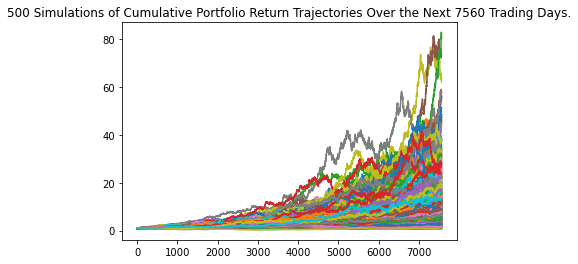

In [37]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_thirty_year.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

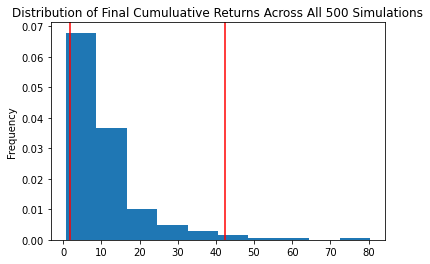

In [38]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirty_year.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [39]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirty_year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean             11.187136
std              10.431525
min               0.670401
25%               5.028237
50%               7.929301
75%              13.151643
max              80.430844
95% CI Lower      1.739664
95% CI Upper     42.350014
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [40]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'Your current total stock and bond balance is ${total_stocks_bonds:.2f}.')


Your current total stock and bond balance is $54296.00.


In [41]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8]* total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_statistics[0]* total_stocks_bonds

# Print the result of your calculations
print(f'There is a 95% chance that an initial investment of ${total_stocks_bonds:.2f} in the portfolio'
      f' over the next 30 years will end within a range of'
      f' ${ci_lower_thirty_cumulative_return:.2f} and ${ci_upper_thirty_cumulative_return:.2f}.')


There is a 95% chance that an initial investment of $54296.00 in the portfolio over the next 30 years will end within a range of $94456.79 and $27148000.00.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [58]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_tenyear = MCSimulation(
    portfolio_data= long_term_prices_df,
    weights=[.20,.80],
    num_simulation=500,
    num_trading_days=252 * 10
)

# Review the simulation input data
MC_tenyear.portfolio_data.head()


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-05-13 04:00:00+00:00  108.83  108.9768  108.815  108.85  6733774   
2019-05-14 04:00:00+00:00  108.90  108.9700  108.870  108.94  6217044   
2019-05-15 04:00:00+00:00  109.16  109.1800  109.000  109.13  2667156   
2019-05-16 04:00:00+00:00  109.04  109.0400  108.950  109.00  2756957   
2019-05-17 04:00:00+00:00  109.12  109.1450  108.935  109.03  2092402   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-05-13 04:00:00+00:00       18575  108.884846          NaN  282.39   
2019-05-14 04:00:00+00:00       21837  108.919203     0.000827  282.01   
2019-05-15 04:00:00+00:00       12362  109.089171     0.001744  281.60   
2019-05-16 04:00:00+00:00        9263  108.993556    -0.001191  285.83   
2019-05-17 04:00:00+00:00        7452  109.023836     0.000275  285.13   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2019-05-13 04:00:00+00:00  283.49  279.9300  280.86  127837979      670187   
2019-05-14 04:00:00+00:00  285.10  281.8500  283.40   77106090      390251   
2019-05-15 04:00:00+00:00  285.77  281.3600  285.06   75152409      364823   
2019-05-16 04:00:00+00:00  289.21  285.7600  287.70   77186068      352847   
2019-05-17 04:00:00+00:00  288.60  285.1207  285.84  100853024      401172   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-05-13 04:00:00+00:00  281.560182          NaN  
2019-05-14 04:00:00+00:00  283.609239     0.009044  
2019-05-15 04:00:00+00:00  284.276653     0.005857  
2019-05-16 04:00:00+00:00  287.797144     0.009261  
2019-05-17 04:00:00+00:00  286.609816    -0.006465

In [59]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sever\Desktop\FinTech-Workspace\Python_Project\Challenge_Files\module_5_challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001986,0.993557,0.989345,1.007297,0.984284,0.991092,1.000504,0.993643,1.019131,0.999626,...,1.012885,1.014120,0.967716,1.010834,0.998182,0.998975,1.017801,0.998263,1.002196,0.997436
2,1.004009,0.993349,0.970481,1.000209,0.973651,0.988048,0.974983,0.982067,1.020424,0.995623,...,1.017648,1.028222,0.956758,1.017169,0.989043,1.000835,1.016184,0.999641,0.999523,0.995824
3,0.977263,0.980825,0.981255,1.008469,0.974208,0.972754,0.965790,0.971951,1.020479,0.976912,...,1.000600,1.010347,0.976414,1.032220,0.981651,1.013489,1.021743,1.004106,0.984188,1.004096
4,0.969290,0.982358,0.968252,1.018961,0.961420,0.973208,0.947657,0.973433,1.026940,0.977006,...,0.995656,1.006061,0.969843,1.033120,0.989603,1.002651,1.025156,0.983293,0.986081,1.013433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.368278,1.965458,3.566106,1.873199,4.880320,2.224370,2.049715,2.368088,2.021955,2.716476,...,1.073740,5.010362,3.089267,3.597667,4.116237,8.881013,2.975868,1.542293,4.405825,1.553431
2517,1.375294,1.925874,3.642763,1.856946,4.945617,2.242946,1.986126,2.385464,2.052969,2.724693,...,1.058408,4.974848,3.066048,3.582420,4.075285,8.796344,2.923749,1.561401,4.300734,1.561521
2518,1.365947,1.927952,3.721498,1.850198,4.910803,2.239822,1.966410,2.416977,2.068436,2.696540,...,1.039315,4.928756,3.071472,3.623988,4.094850,8.629512,2.887551,1.551974,4.288605,1.594250
2519,1.368530,1.920077,3.700607,1.850633,4.811959,2.239183,2.000323,2.433245,2.063859,2.675824,...,1.039454,4.978902,3.074323,3.639478,4.074681,8.789748,2.884356,1.555413,4.270015,1.613589


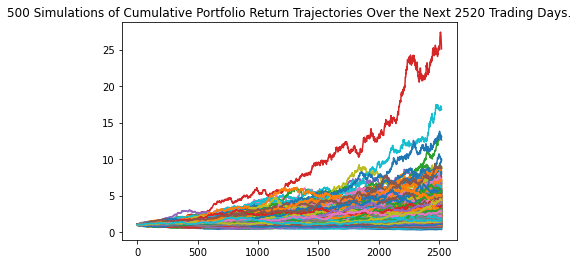

In [60]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_tenyear.plot_simulation()


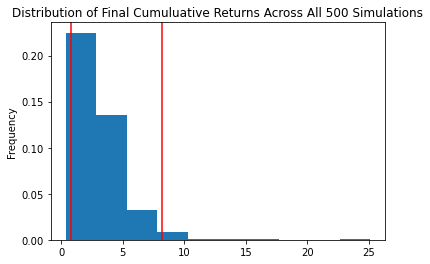

In [61]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_tenyear.plot_distribution()


In [62]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_tenyear_summstats = MC_tenyear.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_tenyear_summstats)

count           500.000000
mean              3.141715
std               2.172555
min               0.364473
25%               1.806979
50%               2.636359
75%               4.045536
max              25.100650
95% CI Lower      0.778366
95% CI Upper      8.218489
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [63]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'Your current total stock and bond balance is ${total_stocks_bonds:.2f}.')


Your current total stock and bond balance is $54296.00.


In [64]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_tenyear_summstats[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_tenyear_summstats[9] * total_stocks_bonds

# Print the result of your calculations
print(f'There is a 95% chance that an initial investment of $10,000 in the portfolio'
      f' over the next 5 years will end within a range of'
      f' ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.')


There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within a range of $ 42262.15 and $ 446231.09.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

##### **ANSWER:** If the portfolio returns closer to the 95th percentile then the members can retire. Other wise they will need a longer term outlook.